In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pymc3 as pm
import arviz as az
import theano.tensor as tt

import os
import sys

from jupyterthemes import jtplot
jtplot.style(theme="monokai")

%matplotlib inline  

This notebook is based on https://gist.github.com/twiecki/c95578a6539d2098be2d83575e3d15fe and http://edwardlib.org/tutorials/probabilistic-pca.

# Twiekci's notebook:

In [27]:
def build_toy_dataset(N, D, K, sigma=1):
    x_train = np.zeros((D, N))
    w = np.random.normal(0.0, 2.0, size=(D, K))
    z = np.random.normal(0.0, 1.0, size=(K, N))
    mean = np.dot(w, z)
    for d in range(D):
        for n in range(N):
            x_train[d, n] = np.random.normal(mean[d, n], sigma)

    print("True principal axes:")
    print(w)
    return x_train

N = 5000  # number of data points
D = 10  # data dimensionality
K = 4  # latent dimensionality

x_train = build_toy_dataset(N, D, K)

True principal axes:
[[-0.10948374 -0.09611981 -1.60791648 -2.71181941]
 [ 3.83481313 -1.62761046  3.64380091 -1.93239472]
 [ 4.1853266   3.16983829 -1.11218147 -2.7040029 ]
 [ 0.14150215 -0.18258878  2.27615623  2.08713746]
 [ 0.34397832  0.18568035  1.24965275  0.04756247]
 [-1.85014533  1.06719164 -0.84291879  0.71611613]
 [ 0.1344433  -0.17944964  0.96301979  3.46214495]
 [-2.82386421 -2.10568968  1.97526075 -1.46268823]
 [-0.14345268  1.31439804 -2.28275934  1.39684117]
 [ 1.39483919  1.15613642 -1.99691366  0.24251239]]


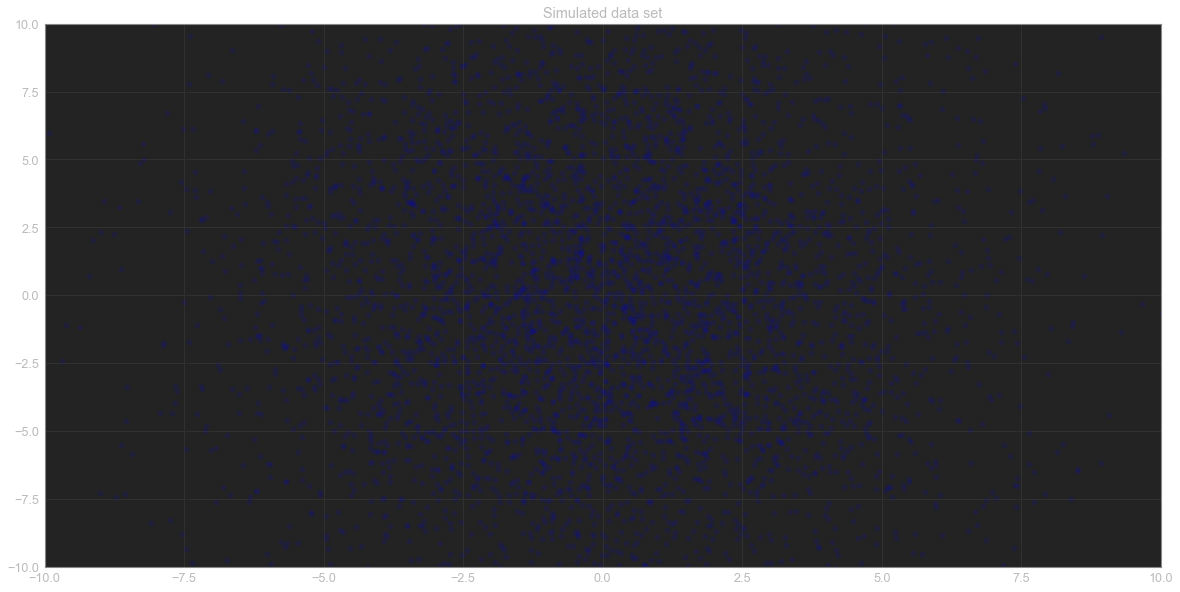

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(x_train[0, :], x_train[1, :], color='blue', alpha=0.1)
plt.axis([-10, 10, -10, 10])
plt.title("Simulated data set")
plt.show()

In [28]:
with pm.Model() as PPCA:
    sigma = pm.Lognormal('sigma', mu=1, sd=5) 
    w = pm.Normal('w', mu=tt.zeros([D, K]), sd=sigma * tt.ones([D, K]), shape=[D, K])
    z = pm.Normal('z', mu=tt.zeros([N, K]), sd=tt.ones([N, K]), shape=[N, K])
    x = pm.Normal('x', mu=w.dot(z.T), sd=tt.ones([D, N]), shape=[D, N], observed=x_train)  

    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, w, sigma]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [04:59<00:00, 13.33draws/s]
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [30]:
az.style.use("arviz-darkgrid")
az.plot_trace(trace, var_names=("w"))

C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not e

C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not e

C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\Users\Jonathan\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not e

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E52B41490>,
      dtype=object)

Error in callback <function flush_figures at 0x0000020E69266790> (for post_execute):


KeyboardInterrupt: 

In [34]:
trace["w"].shape

(2000, 10, 4)

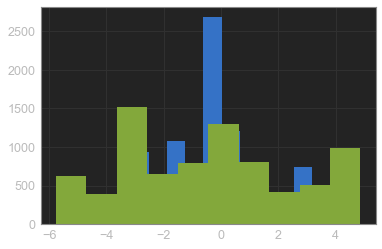

In [45]:
tshape = trace["w"].shape
for j in range(2):
#for j in range(tshape[1]):
    plt.hist(np.reshape(trace["w"][:,j,:], (tshape[0]*tshape[2])))

In [43]:
trace["w"][:,0,:].shape

(2000, 4)

Idea for multivariate student T PCA?
https://arxiv.org/pdf/2010.10786.pdf